시작 년도를 입력하세요. : 2010
마지막 년도를 입력하세요. : 2020
기온 변화를 측정할 달을 입력하세요. :12


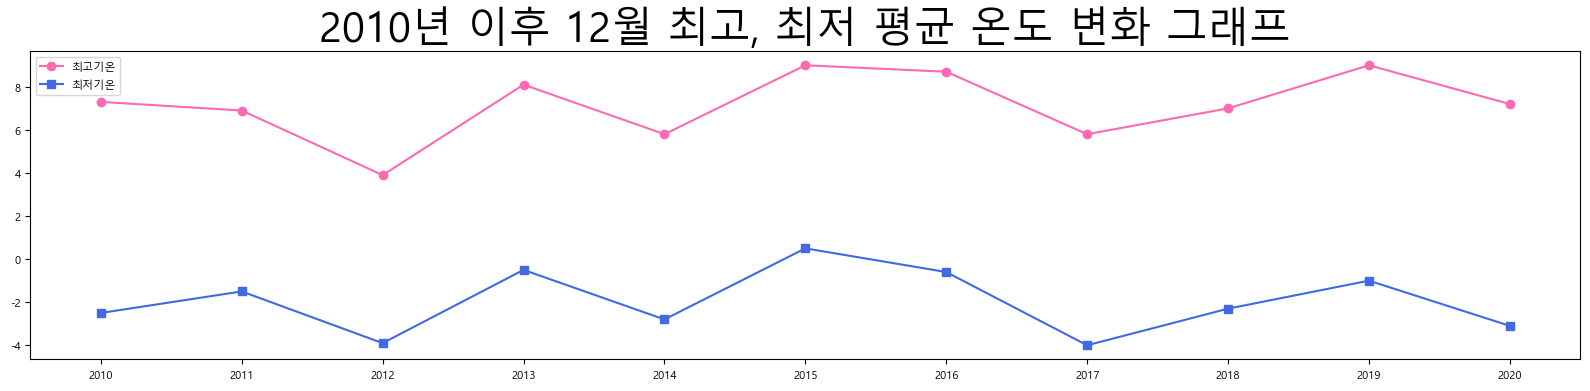

2010년 이후 12월 최고, 최저 평균 온도 변화 그래프
12월 최저기온 평균
 -2.5 -1.5 -3.9 -0.5 -2.8 0.5 -0.6 -4.0 -2.3 -1.0 -3.1
12월 최고기온 평균
 7.3 6.9 3.9 8.1 5.8 9.0 8.7 5.8 7.0 9.0 7.2


In [23]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import platform

def inputdate_info():
    
    high_temp = [] # 최고 기온을 저장할 리스트
    low_temp = [] # 최저 기온을 저장할 리스트
    x_year = [] # x축 연도를 저장할 리스트
    
    first_year = int(input('시작 년도를 입력하세요. : '))
    last_year = int(input('마지막 년도를 입력하세요. : '))
    month = int(input('기온 변화를 측정할 달을 입력하세요. :'))

    daegu_df = pd.read_csv('daegu-utf8.csv', encoding='utf-8-sig')
    daegu_df.columns = ['날짜','지점','평균기온','최저기온','최고기온']
    daegu_df['날짜'] = pd.to_datetime(daegu_df['날짜'],format='%Y-%m-%d')
    
    
    daegu_df = daegu_df[(daegu_df['날짜'].dt.year >= first_year) & (daegu_df['날짜'].dt.year <= last_year) & (daegu_df['날짜'].dt.month == month)]

    #특정월의 평균
    for i in range(first_year, last_year+1):
        month_tem = daegu_df[daegu_df['날짜'].dt.year == i]
        high_temp.append(round(month_tem['최고기온'].mean(),1))
        low_temp.append(round(month_tem['최저기온'].mean(),1))
        x_year.append(i)
    
#     print(high_temp)
#     print(low_temp)
#     print(x_year)
    
    plt.rc('axes', unicode_minus=False)
    plt.rcParams['axes.unicode_minus'] = False
    
    plt.figure(figsize=(20, 4))
    plt.plot(x_year, high_temp, 'hotpink', marker='o', label='최고기온')
    plt.plot(x_year, low_temp, 'royalblue', marker='s', label='최저기온')
    
    if platform.system() == 'Windows':
        plt.rc('font', family='Malgun Gothic', size=8)
    else:
        plt.rc('font', family='AppleGothic', size=8) # 한글 폰트 사용 For Mac OS
    plt.rcParams['axes.unicode_minus'] = False
    plt.title("{0}년 이후 {1}월 최고, 최저 평균 온도 변화 그래프".format(first_year, month), size=30)
    plt.xticks(x_year)
    plt.legend(loc=2)
    plt.show()
    
    print("{0}년 이후 {1}월 최고, 최저 평균 온도 변화 그래프".format(first_year, month))
    print("{0}월 최저기온 평균\n".format(month),*low_temp)
    print("{0}월 최고기온 평균\n".format(month),*high_temp)
    
inputdate_info()
                 